#Import libraries and Datasets

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torch.nn.functional as F

#Dataset and DataLoader
#transform pipelinne for MNIST dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

#load the training and test datasets
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)

test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)



100%|██████████| 9.91M/9.91M [00:00<00:00, 124MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 31.2MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 59.0MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 5.82MB/s]


#Check the data

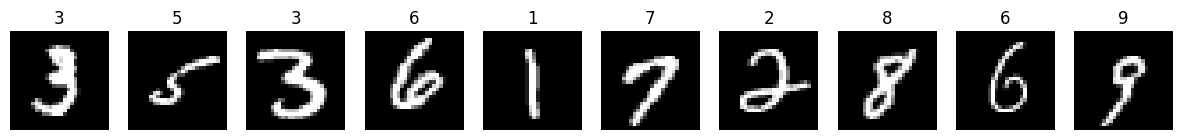

In [4]:

#display some sample images
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 10, figsize=(15, 2))
for i in range(10,20):
    axes[i-10].imshow(train_dataset[i][0].squeeze(), cmap='gray')
    axes[i-10].set_title(train_dataset[i][1])
    axes[i-10].axis('off')



In [5]:
# Get one batch from the DataLoader
images, labels = next(iter(train_loader))

# Print shapes
print(f'Images shape: {images.shape}')
print(f'Labels shape: {labels.shape}')

Images shape: torch.Size([64, 1, 28, 28])
Labels shape: torch.Size([64])


#Define neural network

In [6]:
# define a simple CNN model
class SimpleCNN(nn.Module):
    def __init__(self):
      super(SimpleCNN, self).__init__()
      self.conv1 = nn.Conv2d(1, 32, kernel_size=3)
      self.conv2 = nn.Conv2d(32, 64, kernel_size=3)
      self.pool=nn.MaxPool2d(2,2)
      self.dropout=nn.Dropout(0.25)
      self.fc1 = nn.Linear(1600, 128) #64*5*5
      self.fc2 = nn.Linear(128, 10)


    def forward(self, x):
      x = self.pool(F.relu(self.conv1(x)))
      x = self.pool(F.relu(self.dropout(self.conv2(x))))
      x = x.view(x.size(0), -1)
      x = F.relu(self.fc1(x))
      x = self.fc2(x)
      return F.softmax(x, dim=1)



#Model Training

In [7]:



# Training function
def train(model,device, train_loader, optimizer, epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 100 == 0:
            print(f'Epoch: {epoch+1}/{epoch}, Batch: {batch_idx+1}/{len(train_loader)}, Loss: {loss.item():.4f}')





#Model Testing

In [8]:
# Testing function
def test(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            accuracy = 100 * correct / total
    print(f'Accuracy of the model on the test set: {accuracy:.2f}%')

#Model initialization

In [9]:
# Initialize the model, loss function, and optimizer

model = SimpleCNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

for epoch in range(4):
    train(model, device, train_loader, optimizer, epoch)
    test(model, test_loader)


Epoch: 1/0, Batch: 1/938, Loss: 2.3037
Epoch: 1/0, Batch: 101/938, Loss: 1.6209
Epoch: 1/0, Batch: 201/938, Loss: 1.5709
Epoch: 1/0, Batch: 301/938, Loss: 1.6461
Epoch: 1/0, Batch: 401/938, Loss: 1.5768
Epoch: 1/0, Batch: 501/938, Loss: 1.5545
Epoch: 1/0, Batch: 601/938, Loss: 1.5899
Epoch: 1/0, Batch: 701/938, Loss: 1.6048
Epoch: 1/0, Batch: 801/938, Loss: 1.5195
Epoch: 1/0, Batch: 901/938, Loss: 1.4739
Accuracy of the model on the test set: 97.68%
Epoch: 2/1, Batch: 1/938, Loss: 1.4902
Epoch: 2/1, Batch: 101/938, Loss: 1.4872
Epoch: 2/1, Batch: 201/938, Loss: 1.4741
Epoch: 2/1, Batch: 301/938, Loss: 1.4774
Epoch: 2/1, Batch: 401/938, Loss: 1.4675
Epoch: 2/1, Batch: 501/938, Loss: 1.4891
Epoch: 2/1, Batch: 601/938, Loss: 1.4915
Epoch: 2/1, Batch: 701/938, Loss: 1.4612
Epoch: 2/1, Batch: 801/938, Loss: 1.4612
Epoch: 2/1, Batch: 901/938, Loss: 1.4830
Accuracy of the model on the test set: 98.54%
Epoch: 3/2, Batch: 1/938, Loss: 1.4711
Epoch: 3/2, Batch: 101/938, Loss: 1.4831
Epoch: 3/2, 

#Save and Load

In [10]:
torch.save(model.state_dict(), 'simple_cnn.pth')


In [17]:
model_test = SimpleCNN().to(device)                     # Recreate the model
model_test.load_state_dict(torch.load('simple_cnn.pth'))  # Load weights
model_test.eval()                                       # Set the model to evaluation mode


SimpleCNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout): Dropout(p=0.25, inplace=False)
  (fc1): Linear(in_features=1600, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)

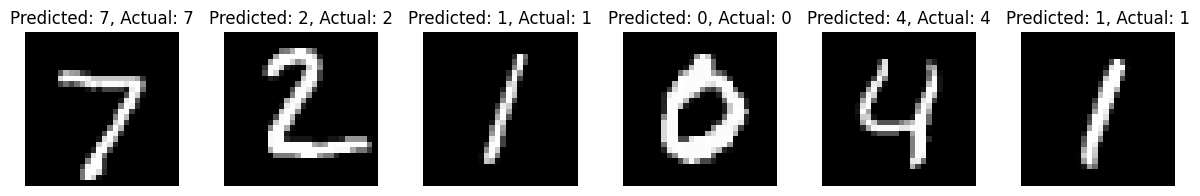

tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 8, 4, 9, 6, 6, 5,
        4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2,
        4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 5, 3])

In [22]:
def predict(model, device, data_loader, num_samples=6):
    model.eval()
    images, labels = next(iter(data_loader)) # Use the passed data_loader
    images = images.to(device)
    labels = labels.to(device)
    with torch.no_grad():
        output = model(images)
        _, predicted = torch.max(output.data, 1)

    fig, axes = plt.subplots(1, num_samples, figsize=(15, 2))
    for i in range(num_samples):
        axes[i].imshow(images[i].squeeze().cpu().numpy(), cmap='gray')
        axes[i].set_title(f'Predicted: {predicted[i].item()}, Actual: {labels[i].item()}')
        axes[i].axis('off')
    plt.show() # Show the plot once after the loop

    return predicted # Return the predicted labels for the batch

predict(model_test, device, test_loader)
